In [129]:
%load_ext autoreload
%autoreload 2
%env CUDA_VISIBLE_DEVICES=1
import matplotlib.pyplot as plt
from utils.utils import get_path
from utils.toydata_utils import get_toy_data
from utils.fig_utils import dataset_to_print
from vis_utils.plot import plot_scatter
import os
from sklearn.decomposition import PCA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
env: CUDA_VISIBLE_DEVICES=1


In [130]:
style_file = "mpl_style.txt"
plt.style.use(style_file)

In [131]:
root_path = get_path("data")
fig_path = os.path.join(root_path, "figures")

# Fig Noiseless toy datasets

In [132]:
# hyperparameters
datasets = ["toy_circle", "eyeglasses", "inter_circles", "toy_sphere", "torus"]
embd_dims= {"toy_circle": 2,
            "eyeglasses": 2,
            "inter_circles": 3,
            "toy_sphere": 3,
            "torus": 3}
n = 1000
data = {dataset: get_toy_data(n=n, dataset=dataset, seed=0, d=embd_dims[dataset]) for dataset in datasets}

for dataset in data:
    data[dataset] = PCA(n_components=embd_dims[dataset]).fit_transform(data[dataset])

/gpfs01/berens/user/sdamrich/mirrored_code/repos/vis_utils/vis_utils/plot.py:407: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  if title is not None:


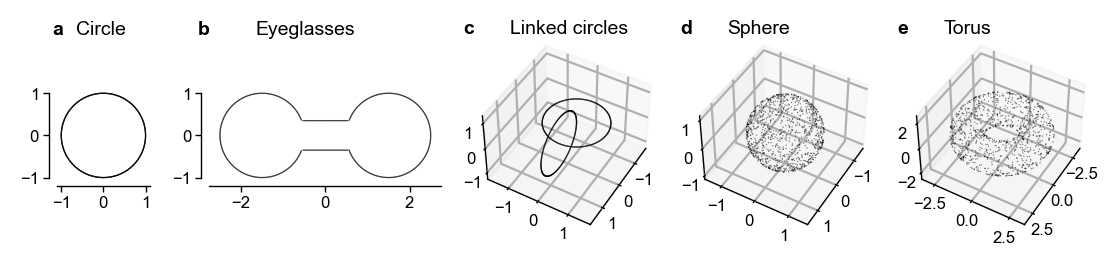

In [133]:
# plot figure
mosaic = "abcde"

pads = [0, 100, 0, 0, 0]
fig, ax = plt.subplot_mosaic(figsize=(5.5, 1.5), width_ratios=[0.4,1,0.8,0.8,0.8], mosaic=mosaic, per_subplot_kw={letter: {} if letter in ["a", "b"] else {"projection": "3d"} for letter in mosaic})

for i, (l, dataset) in enumerate(zip(mosaic, datasets)):
    # plot the data
    plot_scatter(x=data[dataset], ax=ax[l], y="k", s=1, alpha=0.5, scalebar=False, clip_on=False)
    ax[l].axis("on")

    # set view for 3D datasets or spine position for 2D datasets
    if embd_dims[dataset] == 3:
        ax[l].view_init(45, 30)
        ax[l].tick_params(pad=-5)
    else:
        ax[l].spines['left'].set_position(('outward', 3))
        ax[l].spines['bottom'].set_position(('outward', 3))

        ax[l].set_ylim(-1.0, 1.0)
        ax[l].set_yticks([-1, 0, 1])
    
    ax[l].set_aspect("equal", "box")
 
    # position dataset names
    if dataset =="eyeglasses":
        ax[l].text(0.2, 1.7, dataset_to_print[dataset], fontsize=7, transform=ax[l].transAxes)
        ax[l].text(-0.05, 1.7, l, fontsize=7, transform=ax[l].transAxes, fontweight="bold")

    elif dataset != "toy_circle":
        ax[l].text2D(0.2, 1.05, dataset_to_print[dataset], fontsize=7, transform=ax[l].transAxes)
        ax[l].text2D(-0.05, 1.05, l, fontsize=7, transform=ax[l].transAxes, fontweight="bold")
    else:
        ax[l].text(0.2, 1.7, dataset_to_print[dataset], fontsize=7, transform=ax[l].transAxes)
        ax[l].text(-0.05, 1.7, l, fontsize=7, transform=ax[l].transAxes, fontweight="bold")

# reduce the padding between subplots
fig.get_layout_engine().set(w_pad=4/ 72, h_pad=4 / 72, hspace=0,
                            wspace=0)
fig.savefig(os.path.join(fig_path, "toy_data.pdf"))